**Problem Framing:**

Credit scores play a pivotal role in personal finance. Whether or not they perfectly capture one’s financial responsibility, they undeniably influence access to loans, credit cards, and other financial products. In fact, many Americans—particularly those with lower scores—report that their credit score has prevented them from securing a financial product in the past year.

Recent survey data indicate that paying off debt is the primary way people have improved their credit scores, while late payments remain the top reason for score declines. Overall, 42% of Americans have seen their scores rise in the last year, whereas 14% say their score has dropped.

Against this backdrop, our first analysis will investigate the impact of late payments on credit scores, as well as how related factors such as outstanding debt and user attributes (income, demographics, etc.) shape this effect.

We will also explore credit utilization—the ratio of used credit to available credit—since it is one of the more direct levers consumers can adjust in their financial habits.

Keeping utilization low (often below 30%) is cited as one of the simplest strategies for maintaining a stronger credit score. However, there is ongoing debate about the precise thresholds, how short-term vs. long-term usage might differently affect scores, and how other credit factors can moderate or even overshadow utilization’s role.

Resource: https://www.lendingtree.com/personal/credit-scores-financial-products-survey/


# Installing and adding Libraries

In [3]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [11]:
!pip install dowhy
!pip install causalml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.1 MB/s eta 0:00:00


In [10]:
from dowhy import CausalModel
from causalml.inference.meta import BaseXRegressor
from sklearn.ensemble import GradientBoostingRegressor

ModuleNotFoundError: No module named 'causalml'

In [5]:
## Add all the new libraries that you used here
!pip install causalml
!pip install dowhy
!pip install econml
!pip install duecredit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 k

In [6]:
import importlib
print(importlib.metadata.version('causalml') )

0.15.3


# Reading the data

In [4]:
# Load CSV files
#df = pd.read_csv('C:/Users/Behzad/Documents/GitHub/Credit_Score_Prediction/Datasets/train_cleaned.csv')
df = pd.read_csv('train_cleaned.csv')
df.shape

(100000, 59)

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Not Specified', 'Mortgage Loan', 'Student Loan',
       'Debt Consolidation Loan', 'Payday Loan', 'Month_num', 'Month_sin',
       'Month_cos', 'Occ_Architect', 'Occ_Developer', 'Occ_Doctor',
       'Occ_Engineer', 'Occ_Entrepreneur', 'Occ_Journalist', 'Occ_Lawyer',
       'Occ_Manager', 'Occ_Mechanic', 'Occ_Media_Manager', 'Occ_Musician',
      

Causal inference relies on preserving the true distribution and relationships among treatment, outcome, and confounders. Creating synthetic data points can break these relationships and bias the effect estimates. We did not have any major imbalances as we saw before so there id no need for methods like SMOTE here.

**Input from Feauture Importance**

Selected Features:

['num__Outstanding_Debt', 'num__Credit_Utilization_Ratio']

Also, Random Forest feauture importance

num__Outstanding_Debt             0.107338
num__Interest_Rate                0.087533
num__Delay_from_due_date          0.050210

Feauture Importance from Lasso CV:

num__Num_of_Delayed_Payment       0.124748
num__Num_Bank_Accounts            0.039877
num__Monthly_Inhand_Salary_log    0.039418

# Causal Inference models

## **Causal Inference Model Description: Option1**

**Research Question**: How does having delayed payments affect an individual’s likelihood of having a good, standard, or poor credit score?

**Treatment Variable:** Delay_from_due_date, Num_of_Delayed_Payment, Delay_Zscore

**Outcome Variable:** Credit Score: categorized as “Good,” “Standard,” or “Poor.”

**Control Variables:**  Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card, Credit_Utilization_Ratio, Monthly_Balance, Credit_History_Age

Here the focus is to measure the causal impact of payment behavior on credit score, we focused on payment behaviour metrics rather than user level metrics.

Check the relationhsip between Outcome and tratment variables

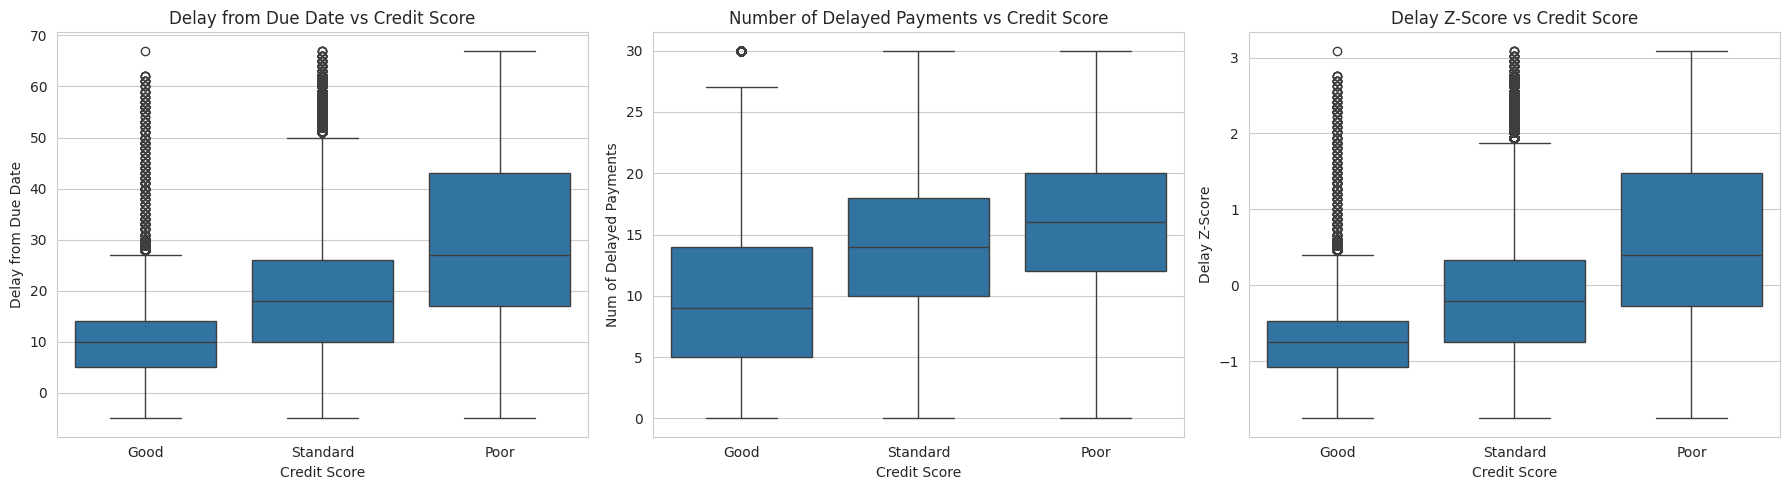

In [7]:
#First plot the relationship between credit score and the three treatments variables
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Define figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Delay_from_due_date vs Credit Score
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=axes[0])
axes[0].set_title('Delay from Due Date vs Credit Score')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Delay from Due Date')

# Plot 2: Num_of_Delayed_Payment vs Credit Score
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=axes[1])
axes[1].set_title('Number of Delayed Payments vs Credit Score')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Num of Delayed Payments')

# Plot 3: Delay_Zscore vs Credit Score
sns.boxplot(x='Credit_Score', y='Delay_Zscore', data=df, ax=axes[2])
axes[2].set_title('Delay Z-Score vs Credit Score')
axes[2].set_xlabel('Credit Score')
axes[2].set_ylabel('Delay Z-Score')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
We see a clear distinction and pattern between different credit scores in terms of the three treatment variables.so we will continue with causal models.

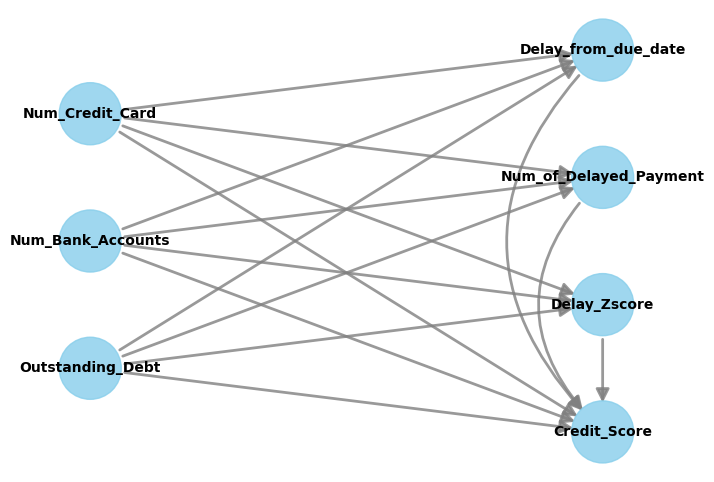

In [13]:
#Build and show the causal model

# Define the Causal Model
model = CausalModel(
    data=df,
    treatment=["Delay_from_due_date", "Num_of_Delayed_Payment", "Delay_Zscore"],
    outcome="Credit_Score",
    common_causes=["Outstanding_Debt", "Num_Bank_Accounts", "Num_Credit_Card"]
)

# Show the model's causal graph
model.view_model()

# Display the causal graph
plt.show()


## **Causal Inference Model Description: Option2** -> failed

**Research Question**: Does an increase or decrease in credit limit influence an individual's credit score over time? The frequency of credit limit changes could reflect financial behavior and lender confidence.

**Treatment Variable**: Changed_Credit_Limit (Number of times a user requested or had their credit limit changed)

**Outcome Variable**: Credit_Score (Categorized as “Good,” “Standard,” or “Poor.”)

**Control Variables**:
Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card, Monthly_Inhand_Salary, Monthly_Inhand_Salary_log, income_zscore, Age

In [25]:
df['Changed_Credit_Limit'].describe()

,Changed_Credit_Limit
count,100000.000000
mean,9.945490
std,6.605945
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,36.000000


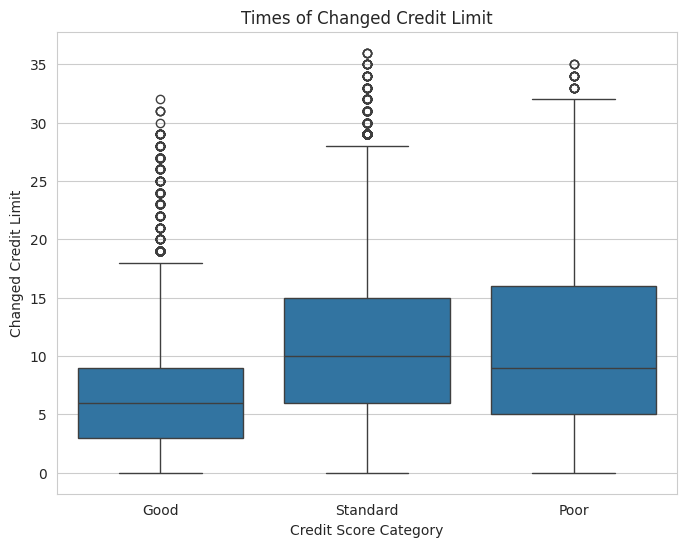

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="Credit_Score", y="Changed_Credit_Limit", data=df)
plt.title("Times of Changed Credit Limit")
plt.xlabel("Credit Score Category")
plt.ylabel("Changed Credit Limit")
plt.show()


In [29]:
import scipy.stats as stats

# Perform ANOVA
anova_result = stats.f_oneway(
    df[df["Credit_Score"] == "Good"]["Changed_Credit_Limit_Lag"],
    df[df["Credit_Score"] == "Standard"]["Changed_Credit_Limit_Lag"],
    df[df["Credit_Score"] == "Poor"]["Changed_Credit_Limit_Lag"]
)

print(f"ANOVA Test Statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Significant difference in Changed_Credit_Limit across Credit Scores.")
else:
    print("No significant difference in Changed_Credit_Limit across Credit Scores.")


ANOVA Test Statistic: nan
P-value: nan
No significant difference in Changed_Credit_Limit across Credit Scores.


So we won't continue the analysis

## **Causal Inference Model Description: Option3** -> failed

Research Question: It is believed that credit utilization ratio and credit score are inversely correlated and keeping this ratio relatively low is one of the most straightforward ways to maintain a healthier credit score.
Does having a higher credit utilization ratio cause a lower credit score?

**Treatment Variable:** Credit_Utilization_Ratio

**Outcome Variable:** Credit Score: categorized as “Good,” “Standard,” or “Poor.”

**Control Variables:**  Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card,Monthly_Inhand_Salary, Monthly_Inhand_Salary_log, income_zscore, Age

 Outstanding_Debt, Num_Bank_Accounts, and Num_Credit_Card capture an individual's overall credit exposure, while Monthly_Inhand_Salary, its log transformation, and income_zscore control for income-related differences in credit management. Age and Credit_History_Age account for the impact of longer credit history and financial maturity, which may influence both credit utilization and score. These controls which are more at the user level, help isolate the causal effect of credit utilization ratio on credit score.

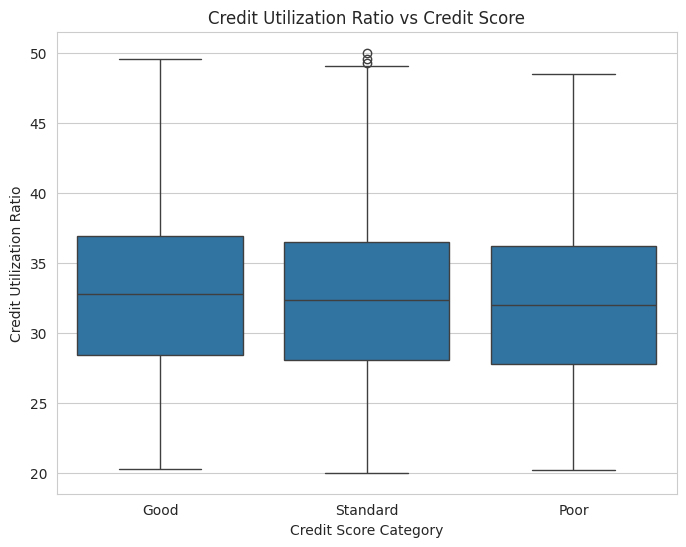

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 6))

# Boxplot: Credit Utilization Ratio vs Credit Score Category
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df)

# Title and labels
plt.title('Credit Utilization Ratio vs Credit Score')
plt.xlabel('Credit Score Category')
plt.ylabel('Credit Utilization Ratio')

# Show the plot
plt.show()


It looks like the distribution is very similar in differnet categories of credit scores. so we need further analysis before decising if it can be analyzed as a treatment or not.
Credit score is a categorical variable so we cannot go with correlation, we will check it with ANOVA instead.

In [15]:
import scipy.stats as stats

# Group Credit Utilization Ratio by Credit Score categories
group_good = df[df["Credit_Score"] == "Good"]["Credit_Utilization_Ratio"]
group_standard = df[df["Credit_Score"] == "Standard"]["Credit_Utilization_Ratio"]
group_poor = df[df["Credit_Score"] == "Poor"]["Credit_Utilization_Ratio"]

# Perform ANOVA test
anova_result = stats.f_oneway(group_good, group_standard, group_poor)

# Print results
print(f"ANOVA Test Statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("There is a significant difference in Credit Utilization Ratio across Credit Score categories.")
else:
    print("There is NO significant difference in Credit Utilization Ratio across Credit Score categories.")


ANOVA Test Statistic: 105.2967
P-value: 0.0000
There is a significant difference in Credit Utilization Ratio across Credit Score categories.


Intersting! so even when the distributions in boxplots were very similar and overlapping aniva tells us there is significant differneces with the means. lets check it further with plotting the means

<ipython-input-16-78cf103af547>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Credit_Score", y="Credit_Utilization_Ratio", data=df, ci=95)


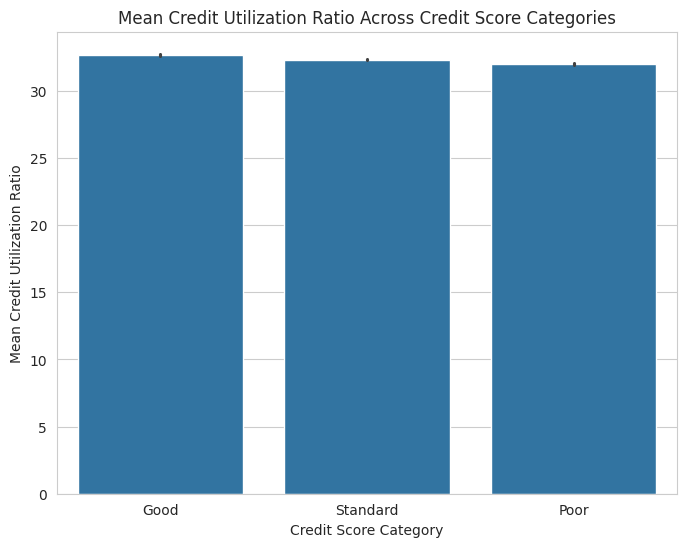

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x="Credit_Score", y="Credit_Utilization_Ratio", data=df, ci=95)
plt.title("Mean Credit Utilization Ratio Across Credit Score Categories")
plt.xlabel("Credit Score Category")
plt.ylabel("Mean Credit Utilization Ratio")
plt.show()


ANOVA tests for statistical significance, meaning that even tiny numerical differences in means can be detected as significant if the sample size is large. Compute effect size (Eta-squared) to see if the difference is meaningful in practice.

In [19]:
df['Credit_Utilization_Ratio'].describe()

,Credit_Utilization_Ratio
count,100000.000000
mean,32.285173
std,5.116875
min,20.000000
25%,28.052567
50%,32.305784
75%,36.496663
max,50.000000


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit an ANOVA model
model = ols("Credit_Utilization_Ratio ~ C(Credit_Score)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Compute Eta-Squared (Effect Size)
eta_squared = anova_table["sum_sq"][0] / anova_table["sum_sq"].sum()

# Print the ANOVA table and effect size
print(anova_table)
print(f"Corrected Effect Size (Eta-Squared): {eta_squared:.4f}")


                       sum_sq       df           F        PR(>F)
C(Credit_Score)  5.502366e+03      2.0  105.296722  2.081137e-46
Residual         2.612712e+06  99997.0         NaN           NaN
Corrected Effect Size (Eta-Squared): 0.0021


<ipython-input-20-e1f53d416b82>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_table["sum_sq"][0] / anova_table["sum_sq"].sum()


0.0021 is an extremely small effect size, meaning that while ANOVA found a statistically significant difference in Credit Utilization Ratio across credit score categories, the practical impact is negligible. **So we do not continue with this option!**

## **Causal Inference Model Description: Option4** -> no relationship

**Research Question**:
It is believed that an individual’s payment behaviour significantly impacts their credit score. Does having a particular Payment Behaviour pattern cause a better or worse Credit Score?

**Treatment Variable**: Payment_Behaviour (Categorical: Different spending & payment patterns)

**Outcome Variable**: Credit_Score (Categorized as “Good,” “Standard,” or “Poor.”)

**Control Variables**:
Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card, Monthly_Inhand_Salary, Monthly_Inhand_Salary_log, income_zscore, Age

In [30]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


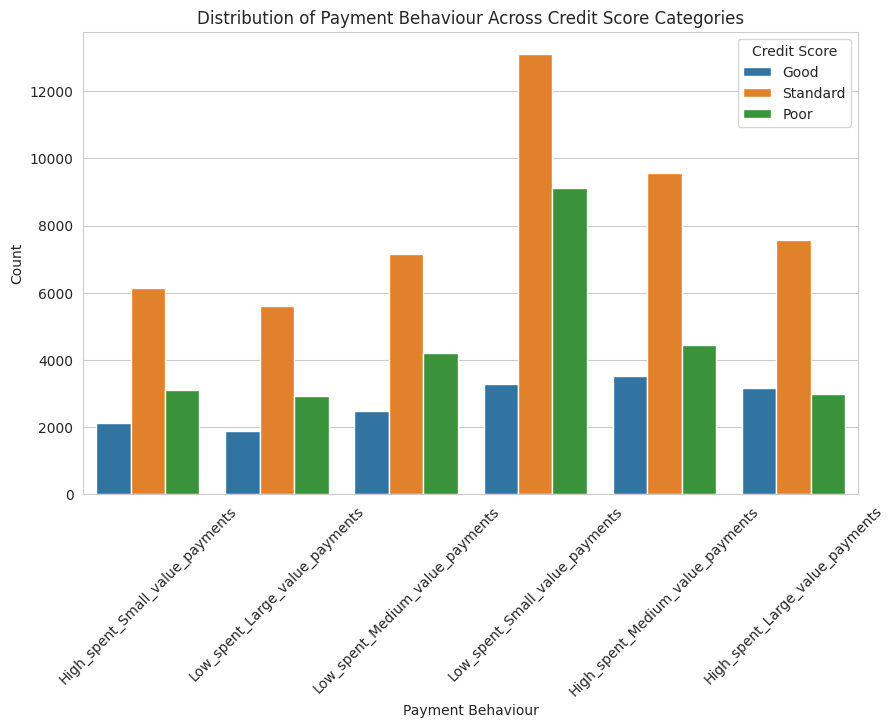

In [31]:
#Check the relationship between unique values of payment behaviour and credit_score

import matplotlib.pyplot as plt
import seaborn as sns

# Drop the invalid value from Payment_Behaviour
df = df[df["Payment_Behaviour"] != "!@9#%8"]

# Create a countplot to visualize the distribution of Payment_Behaviour across Credit Score categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Payment_Behaviour", hue="Credit_Score")

# Customize the plot
plt.title("Distribution of Payment Behaviour Across Credit Score Categories")
plt.xlabel("Payment Behaviour")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Credit Score")

# Show the plot
plt.show()


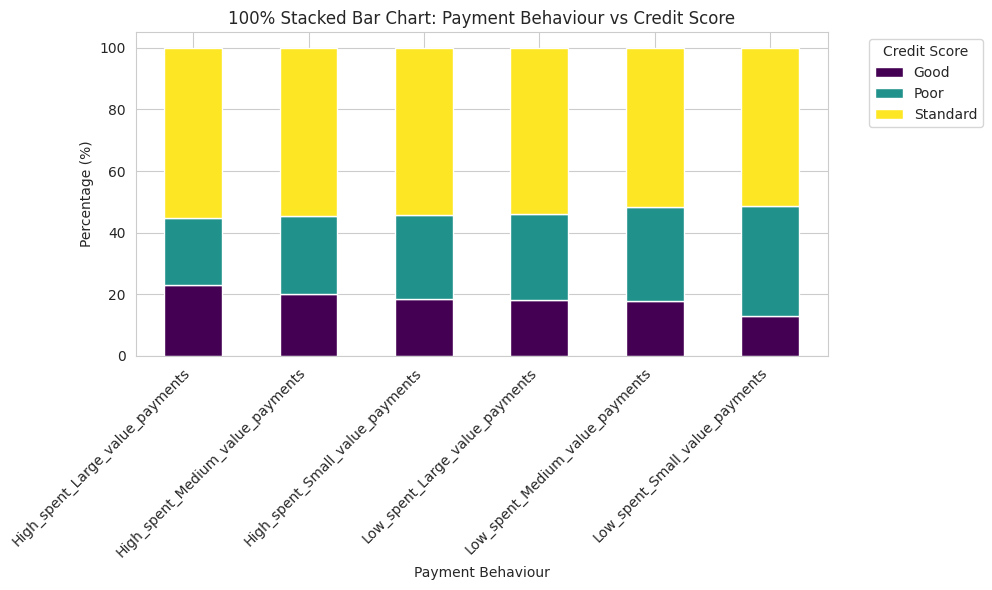

In [32]:
#Chaneg the graph to 100 stacked bar so we can take a look at the ratios and have a better undertsnding

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop the invalid value from Payment_Behaviour
df = df[df["Payment_Behaviour"] != "!@9#%8"]

# Compute the count of each category
payment_credit_counts = df.groupby(["Payment_Behaviour", "Credit_Score"]).size().unstack()

# Convert counts to percentages (normalize by row)
payment_credit_percent = payment_credit_counts.div(payment_credit_counts.sum(axis=1), axis=0) * 100

# Plot a 100% stacked bar chart
payment_credit_percent.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Customize the plot
plt.title("100% Stacked Bar Chart: Payment Behaviour vs Credit Score")
plt.xlabel("Payment Behaviour")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.legend(title="Credit Score", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
import scipy.stats as stats
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df["Payment_Behaviour"], df["Credit_Score"])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between Payment Behaviour and Credit Score.")
else:
    print("No significant relationship found between Payment Behaviour and Credit Score.")


Chi-Square Statistic: 1430.6229
P-value: 0.0000
There is a significant relationship between Payment Behaviour and Credit Score.


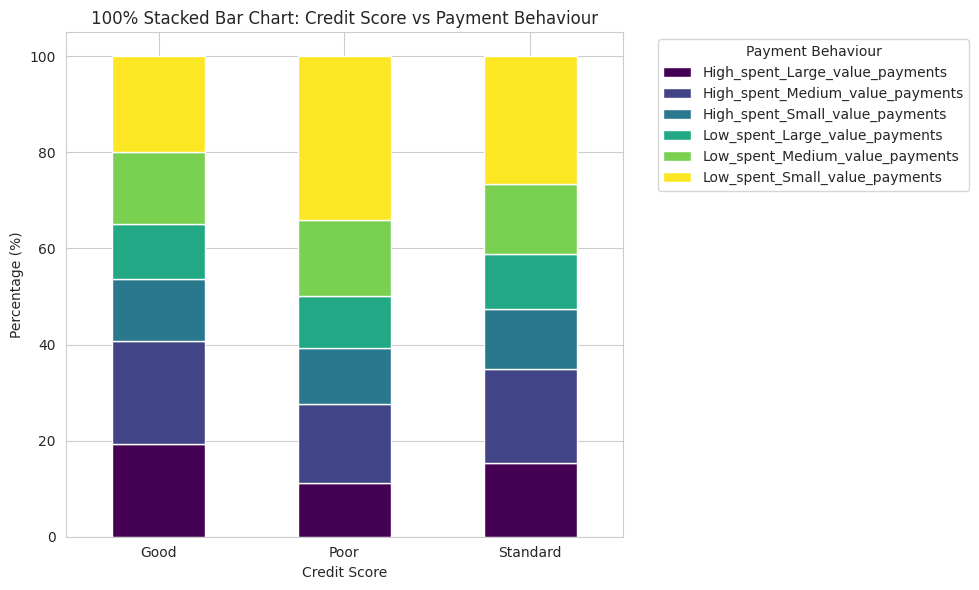

In [36]:
#Flip the axis to see if we can capture the relationship
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop the invalid value from Payment_Behaviour
df = df[df["Payment_Behaviour"] != "!@9#%8"]

# Compute the count of each Payment Behaviour within each Credit Score category
credit_payment_counts = df.groupby(["Credit_Score", "Payment_Behaviour"]).size().unstack()

# Convert counts to percentages (normalize by column)
credit_payment_percent = credit_payment_counts.div(credit_payment_counts.sum(axis=1), axis=0) * 100

# Plot a 100% stacked bar chart
credit_payment_percent.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Customize the plot
plt.title("100% Stacked Bar Chart: Credit Score vs Payment Behaviour")
plt.xlabel("Credit Score")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Payment Behaviour", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
import numpy as np
import scipy.stats as stats

# Create contingency table
contingency_table = pd.crosstab(df["Credit_Score"], df["Payment_Behaviour"])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Compute Cramér's V
n = contingency_table.sum().sum()  # Total sample size
min_dim = min(contingency_table.shape) - 1  # Minimum of rows or columns minus 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Cramér's V (Effect Size): {cramers_v:.4f}")

# Interpretation
if cramers_v < 0.1:
    print("Negligible relationship")
elif cramers_v < 0.3:
    print("Small relationship")
elif cramers_v < 0.5:
    print("Moderate relationship")
else:
    print("Strong relationship")


Chi-Square Statistic: 1430.6229
P-value: 0.0000
Cramér's V (Effect Size): 0.0880
Negligible relationship


Chi-Square tells us if there is any relationship, but it doesn't tell us how strong the relationship is. So Cramer's v tell us we should not continue.